In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score



In [2]:
cd "/content/drive/My Drive/Colab Notebooks/matrix_dw"


/content/drive/My Drive/Colab Notebooks/matrix_dw


In [0]:
df = pd.read_csv('data/shoes_prices.csv', low_memory=False)

In [20]:

df_usd = df[ df.prices_currency =='USD' ].copy()

df_usd["prices_amountmin"] = df_usd.prices_amountmin.astype(np.float)
filter_max = np.percentile( df_usd[ 'prices_amountmin'], 99)
df_filter = df_usd[ df_usd['prices_amountmin'] < filter_max ]
#df_filter.shape
df_usd.shape

(18058, 48)

In [10]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [21]:
mean_price = np.mean( df['prices_amountmin'] )
mean_price

87.3985701628032

In [22]:
[1] * 5

[1, 1, 1, 1, 1]

In [23]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

56.43260311205122

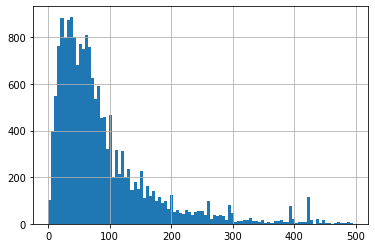

In [24]:
df['prices_amountmin'].hist(bins=100)

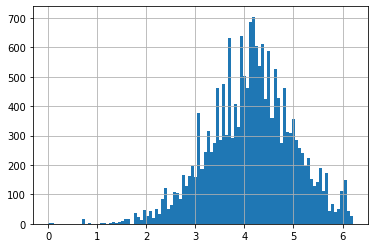

In [25]:
np.log( df['prices_amountmin'] + 1).hist(bins=100)

In [26]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

52.226772621552776

In [27]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean( np.log1p(y_true)))

y_pred = [price_log_mean] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

52.260733650665316

In [28]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df['brand_cat'] = df.brand.factorize()[0]

In [0]:
feasts = ['brand_cat']

def run_model(feasts):
  x = df[ feasts ].values
  y = df[ 'prices_amountmin']

  model = DecisionTreeRegressor(max_depth= 5)

  scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')

  return(np.mean(scores) , np.std(scores))

In [41]:
run_model(['brand_cat'])

(-51.91177984469137, 3.2170171083589953)

In [0]:
df['colors_cat'] = df.colors.factorize()[0]

In [44]:
run_model( ['colors_cat'] )

(-55.49258706584963, 3.2603331160488502)

In [46]:
run_model( ['brand_cat', 'colors_cat'])

(-53.59922961072592, 2.9657372767037176)

In [48]:
ls


data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md
